# Data Treatment

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import stemgraphic
import seaborn as sns
from scipy import stats as st

plt.rcParams["figure.figsize"] = (16, 8)
plt.style.use("bmh")

## Qualitative Variables

In [19]:
data = [
    *["North"] * 18,
    *["West"] * 11,
    *["Center"] * 13,
    *["South"] * 34,
    *["Southeast"] * 29,
]

failures = pd.Series(data)

In [20]:
failures.value_counts()

South        34
Southeast    29
North        18
Center       13
West         11
Name: count, dtype: int64

In [21]:
failures.value_counts(normalize=True)

South        0.323810
Southeast    0.276190
North        0.171429
Center       0.123810
West         0.104762
Name: proportion, dtype: float64

<Axes: ylabel='count'>

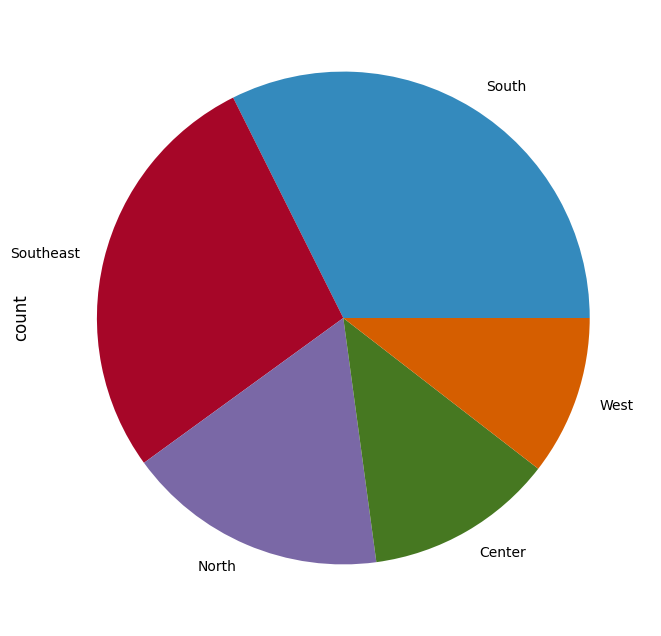

In [22]:
failures.value_counts().plot(kind="pie")

<Axes: >

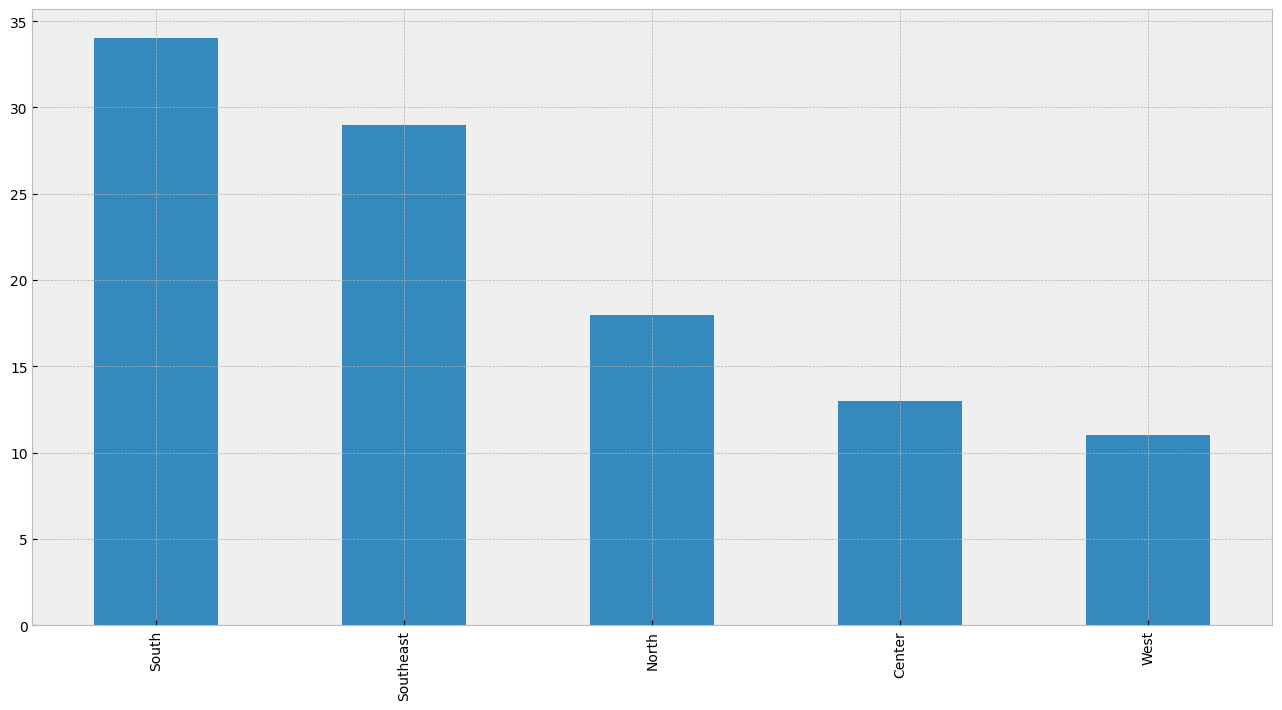

In [23]:
failures.value_counts().plot(kind="bar")

In [24]:
data = [
    *["Physical Connection"] * 1,
    *["Electric Failure"] * 8,
    *["Server Software"] * 28,
    *["Server Hardware"] * 4,
    *["Server without Available Memory"] * 14,
    *["Insufficient Bandwidth"] * 1,
]

failure_reasons = pd.Series(data)

<Axes: >

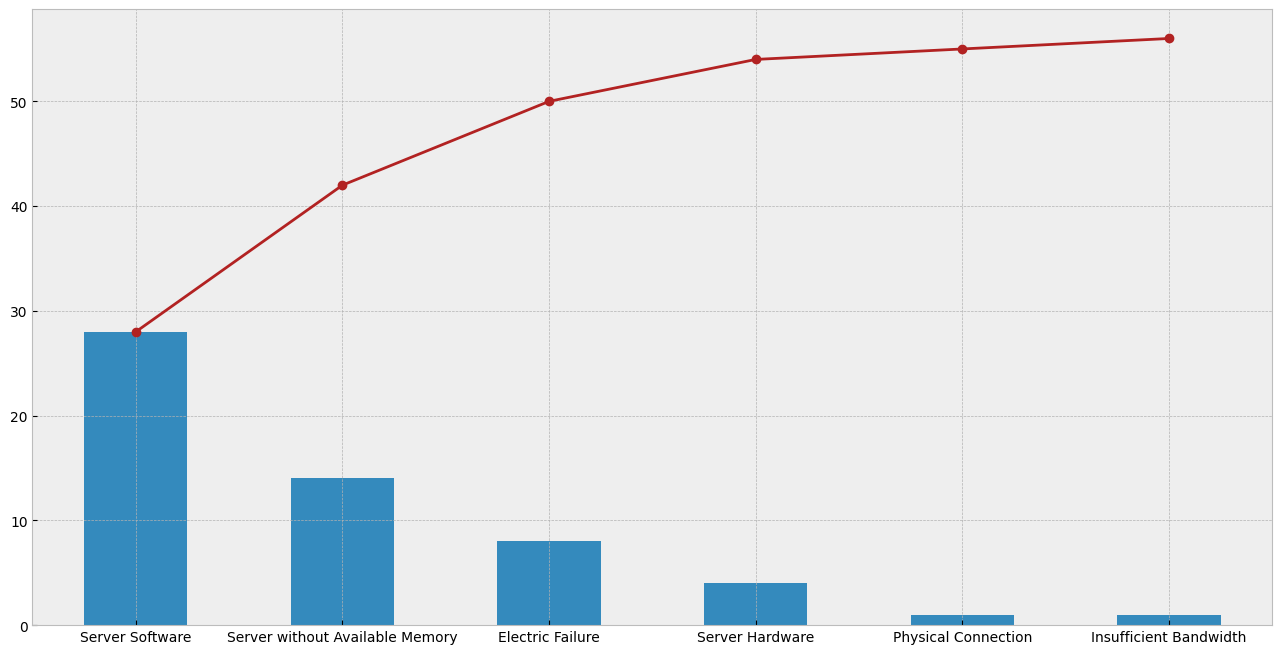

In [25]:
failure_reasons_cummulative_frequencies = failure_reasons.value_counts().cumsum()
failure_reasons_absolute_frequencies = failure_reasons.value_counts()
failure_reasons_absolute_frequencies.plot(kind="bar")
failure_reasons_cummulative_frequencies.plot(kind="line", color="firebrick", marker="o")

In [26]:
data = [
    84,
    88,
    87,
    89,
    88,
    89,
    88,
    91,
    87,
    85,
    88,
    89,
    90,
    88,
    87,
    91,
    86,
    89,
    85,
    88,
    86,
    90,
    89,
    84,
    91,
    92,
    89,
    88,
    94,
    90,
    87,
    89,
    91,
    86,
    90,
    89,
    91,
    92,
    89,
    88,
    85,
    88,
    87,
    88,
    91,
    87,
    92,
    90,
    85,
    87,
]

terminal_usage = pd.Series(data)

In [27]:
table = pd.DataFrame(index=terminal_usage.unique())
table["Variable Value $x_k$"] = terminal_usage.unique()
table["Absolute Frequency $n_k$"] = terminal_usage.value_counts()
table["Cummulative Absolute Frequency $N_k$"] = table["Absolute Frequency $n_k$"].cumsum()
table["Relative Frequency $f_k$"] = terminal_usage.value_counts(normalize=True)
table["Cummulative Relative Frequency $F_k$"] = table["Relative Frequency $f_k$"].cumsum()
table = table.sort_index()
table

,Variable Value $x_k$,Absolute Frequency $n_k$,Cummulative Absolute Frequency $N_k$,Relative Frequency $f_k$,Cummulative Relative Frequency $F_k$
84,84,2,2,0.04,0.04
85,85,4,38,0.08,0.76
86,86,3,46,0.06,0.92
87,87,7,19,0.14,0.38
88,88,10,12,0.20,0.24
89,89,9,28,0.18,0.56
90,90,5,43,0.10,0.86
91,91,6,34,0.12,0.68
92,92,3,49,0.06,0.98
94,94,1,50,0.02,1.00


<Axes: >

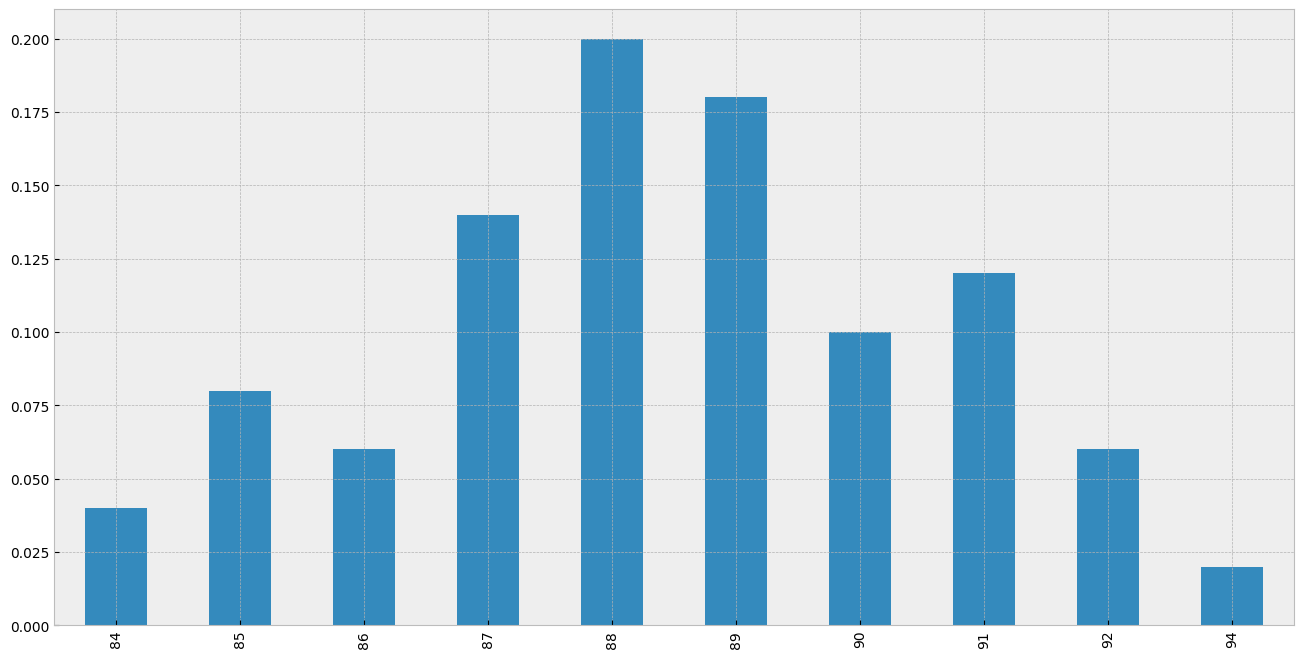

In [28]:
terminal_usage.value_counts(normalize=True).sort_index().plot(kind="bar")

In [131]:
data = [
    85,
    117,
    92,
    120,
    94,
    110,
    151,
    90,
    80,
    116,
    95,
    102,
    100,
    113,
    118,
    140,
    133,
    108,
    115,
    148,
    110,
    130,
    100,
    120,
    108,
    125,
    105,
    130,
    112,
    150,
]

storage_used = pd.Series(data)

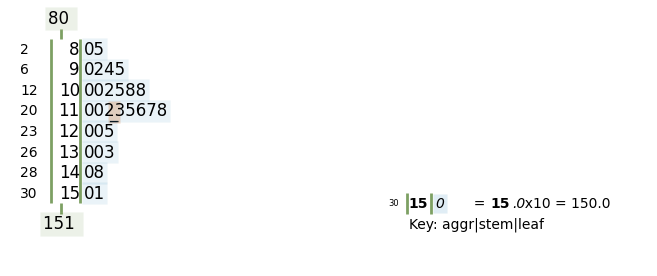

In [132]:
stemgraphic.stem_graphic(storage_used, scale=10, asc=False)
plt.show()

In [31]:
table

,Variable Value $x_k$,Absolute Frequency $n_k$,Cummulative Absolute Frequency $N_k$,Relative Frequency $f_k$,Cummulative Relative Frequency $F_k$
84,84,2,2,0.04,0.04
85,85,4,38,0.08,0.76
86,86,3,46,0.06,0.92
87,87,7,19,0.14,0.38
88,88,10,12,0.20,0.24
89,89,9,28,0.18,0.56
90,90,5,43,0.10,0.86
91,91,6,34,0.12,0.68
92,92,3,49,0.06,0.98
94,94,1,50,0.02,1.00


In [101]:
bins = [79, 91, 103, 115, 127, 139, 152]
counts = pd.cut(x=storage_used, bins=bins, right=False).value_counts().sort_index().reset_index()
# table["Absolute Frequency $n_k$"] = table.value_counts()
table = pd.DataFrame()
table["Class Interval"] = counts["index"]
table["Middle Point"] = table["Class Interval"].apply(lambda x: x.mid)
table["Absolute Frequency $n_k$"] = counts["count"]
table["Relative Frequency $f_k$"] = (table["Absolute Frequency $n_k$"] / table["Absolute Frequency $n_k$"].sum()).round(2)
table["Cummulative Absolute Frequency $N_k$"] = table["Absolute Frequency $n_k$"].cumsum()
table["Cummulative Relative Frequency $F_k$"] = table["Relative Frequency $f_k$"].cumsum()
table

,Class Interval,Middle Point,Absolute Frequency $n_k$,Relative Frequency $f_k$,Cummulative Absolute Frequency $N_k$,Cummulative Relative Frequency $F_k$
0,"[79, 91)",85.0,3,0.10,3,0.10
1,"[91, 103)",97.0,6,0.20,9,0.30
2,"[103, 115)",109.0,7,0.23,16,0.53
3,"[115, 127)",121.0,7,0.23,23,0.76
4,"[127, 139)",133.0,3,0.10,26,0.86
5,"[139, 152)",145.5,4,0.13,30,0.99


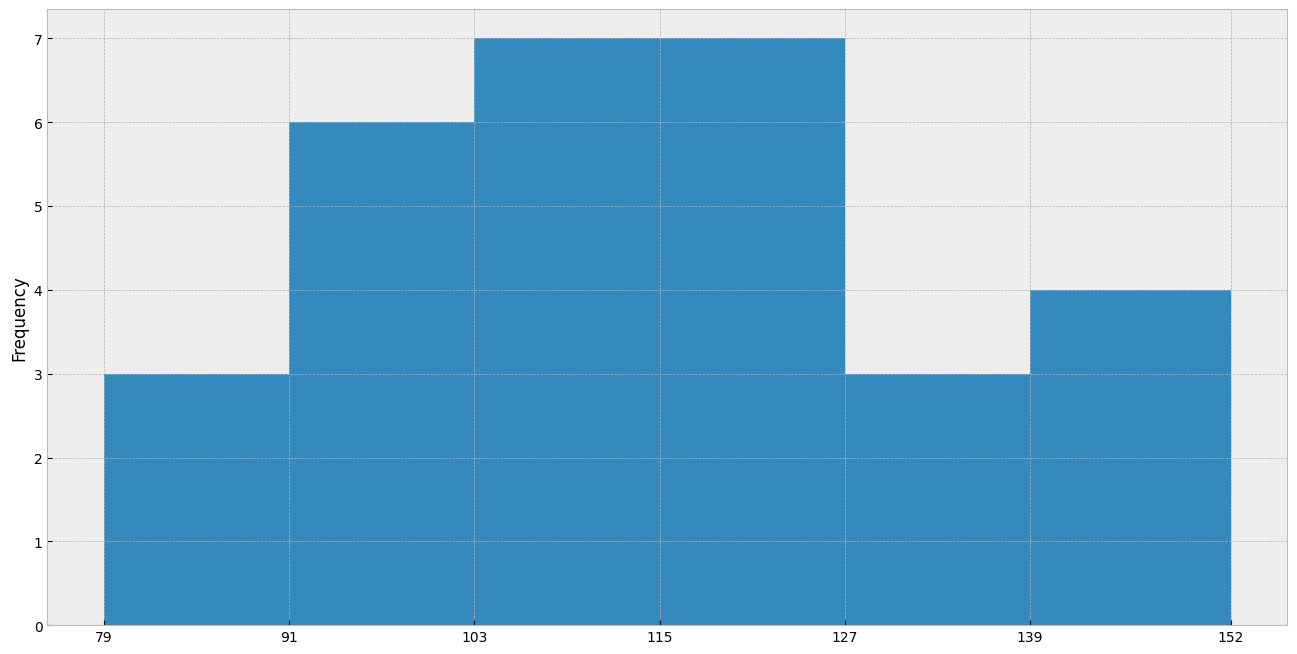

In [103]:
storage_used.plot(kind="hist", bins=bins)
plt.xticks(bins)
plt.show()

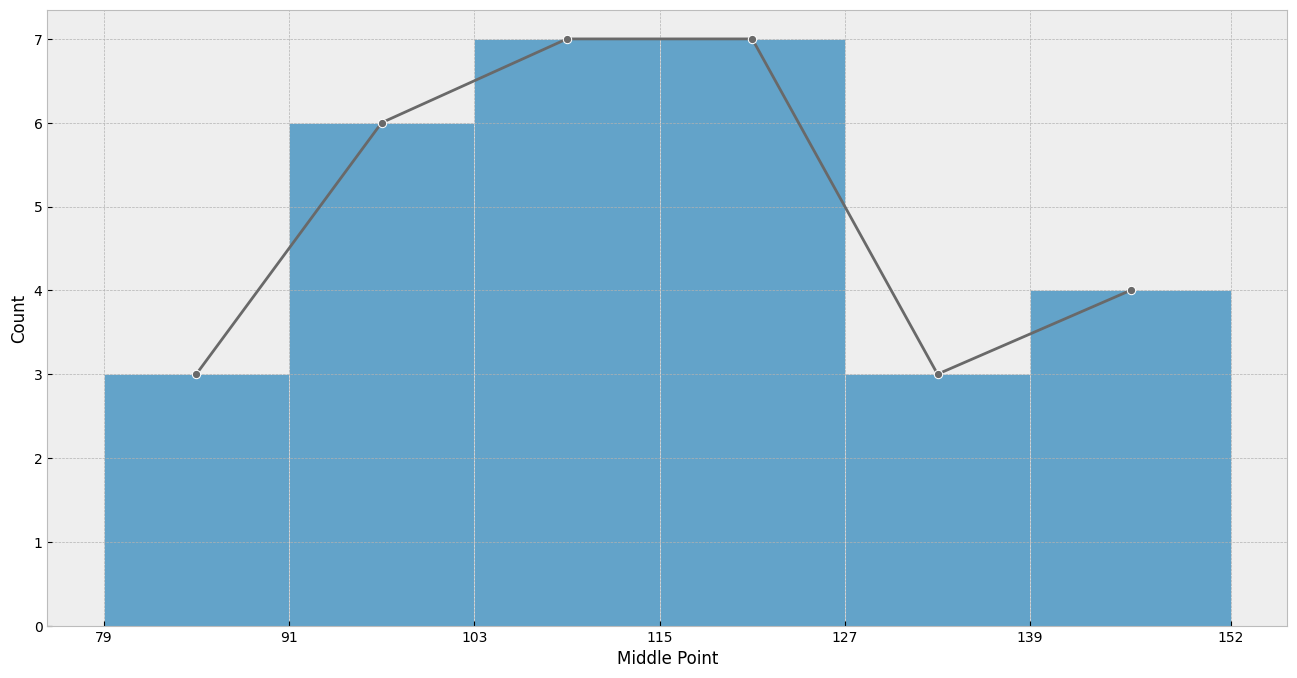

In [108]:
sns.histplot(storage_used, bins=bins, stat="count")
sns.lineplot(table, x="Middle Point", y="Absolute Frequency $n_k$", color="dimgray", marker="o")
plt.xticks(bins)
plt.show()

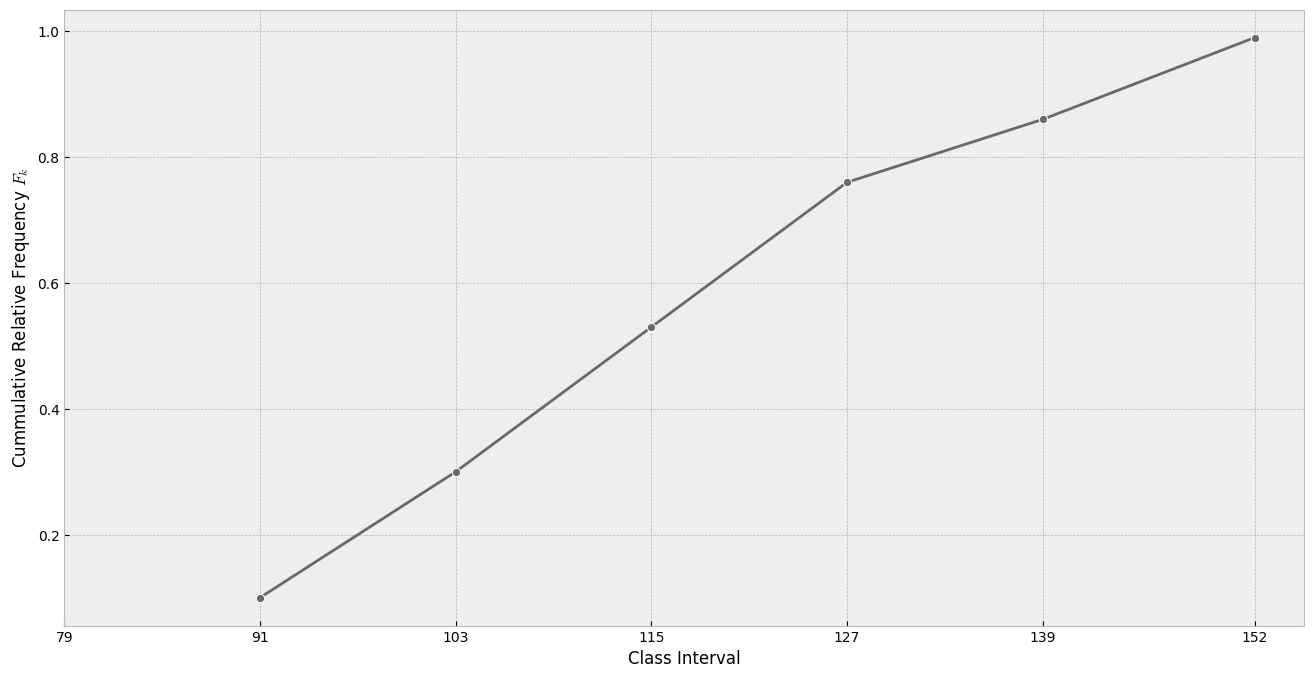

In [122]:
sns.lineplot(table, x=table["Class Interval"].apply(lambda x: x.right), y="Cummulative Relative Frequency $F_k$", color="dimgray", marker="o")
plt.xticks(bins)
plt.show()

In [123]:
data = [
    105,
    221,
    183,
    186,
    121,
    181,
    180,
    143,
    97,
    154,
    153,
    174,
    120,
    168,
    167,
    141,
    245,
    228,
    174,
    199,
    181,
    158,
    176,
    110,
    163,
    131,
    154,
    115,
    160,
    208,
    158,
    133,
    207,
    180,
    190,
    193,
    194,
    133,
    156,
    123,
    134,
    178,
    76,
    167,
    184,
    135,
    229,
    146,
    218,
    157,
    101,
    171,
    165,
    172,
    158,
    169,
    199,
    151,
    142,
    163,
    145,
    171,
    148,
    158,
    160,
    175,
    149,
    87,
    160,
    237,
    150,
    135,
    196,
    201,
    200,
    176,
    150,
    170,
    118,
    149,
]

tension_resistance = pd.Series(data)

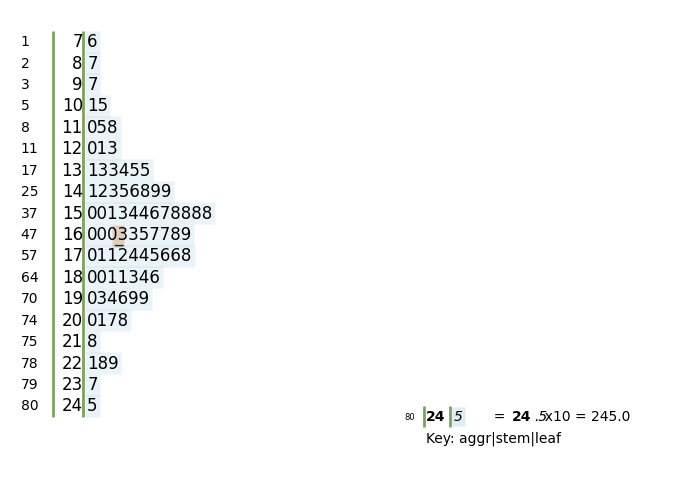

In [136]:
stemgraphic.stem_graphic(tension_resistance, scale=10, asc=False, aggregation=len)
plt.show()

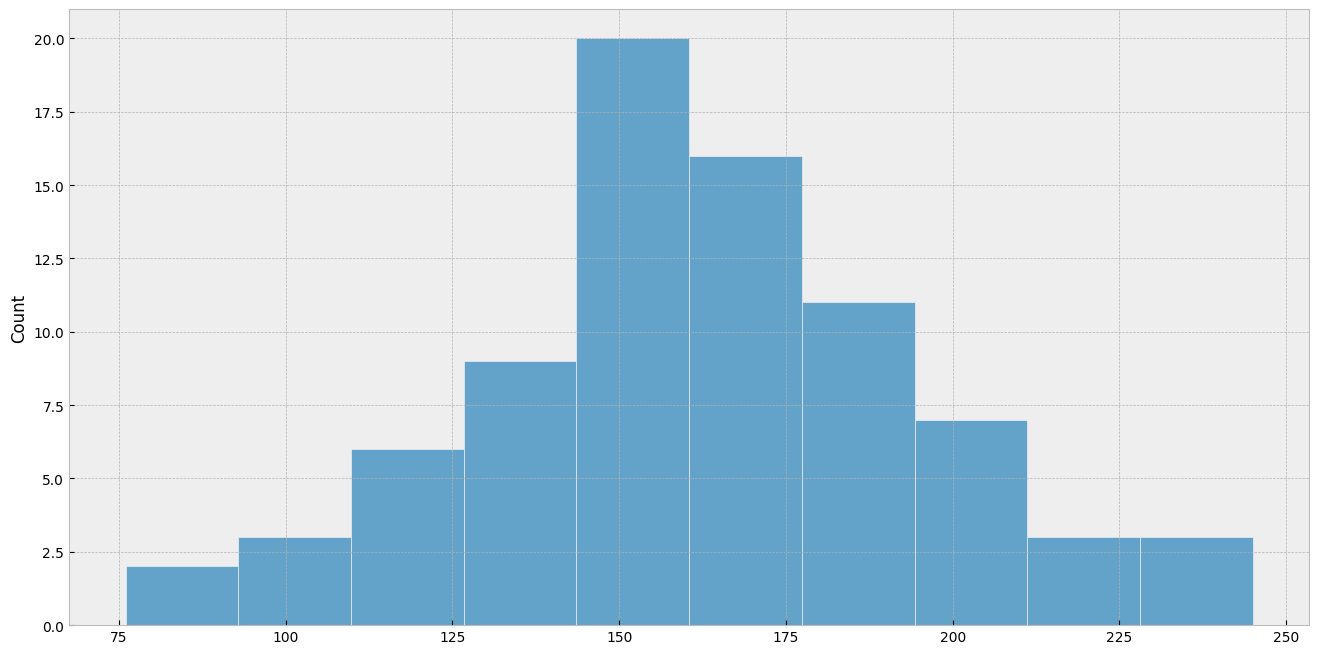

In [138]:
sns.histplot(tension_resistance, stat="count")
plt.show()

## Statistics

In [194]:
from IPython.display import display, Latex

terminal_usage_mean = np.mean(terminal_usage)
terminal_usage_median = np.median(terminal_usage)
terminal_usage_mode = st.mode(terminal_usage).mode
terminal_usage_q1 = np.quantile(terminal_usage, 0.25)
terminal_usage_q3 = np.quantile(terminal_usage, 0.75)

display(Latex("$\\bar{x}$ = " + f"{terminal_usage_mean:.2f}"))
display(Latex("$\\tilde{x}$ = " + f"{terminal_usage_median:.2f}"))
display(Latex("$\\hat{x}$ = " + f"{terminal_usage_mode:.2f}"))
display(Latex("$q_1$ = " + f"{terminal_usage_q1:.2f}"))
display(Latex("$q_3$ = " + f"{terminal_usage_q3:.2f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [193]:
terminal_usage_variance = np.var(terminal_usage, ddof=1)
terminal_usage_standard_deviation = np.std(terminal_usage, ddof=1)
terminal_usage_iqr = st.iqr(terminal_usage)

display(Latex("$s^2$ = " + f"{terminal_usage_variance:.2f}"))
display(Latex("$s$ = " + f"{terminal_usage_standard_deviation:.2f}"))
display(Latex("$iqr$ = " + f"{terminal_usage_iqr:.2f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [202]:
vacuum_cleaners_mean = 12.2
vacuum_cleaners_standard_deviation = 0.85

terminal_usage_coefficient_of_variation = terminal_usage_standard_deviation / terminal_usage_mean
vacuum_cleaners_coefficient_of_variation = vacuum_cleaners_standard_deviation / vacuum_cleaners_mean

display(Latex("${c.v.}_X$ = " + f"{terminal_usage_coefficient_of_variation:.2%}"))
display(Latex("${c.v.}_Y$ = " + f"{vacuum_cleaners_coefficient_of_variation:.2%}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [238]:
storage_used_mean = storage_used.mean()
storage_used_std = storage_used.std()

empirical_rule = [68, 95, 99.7]

table = pd.DataFrame()
rows = []
for k, rule in zip(range(1, 4), empirical_rule):
    row = {}
    row["k"] = k
    x_minus_k = (storage_used_mean - k * storage_used_std).round(4)
    x_plus_k = (storage_used_mean + k * storage_used_std).round(4)
    row["$\\bar{x} \pm k . s$"] = f"{storage_used_mean} +/- {k * storage_used_std:.2f}"
    row["Range"] = x_minus_k.astype(str) + " - " + x_plus_k.astype(str)
    row["Empirical Rule"] = rule
    row["Real Proportion"] = (storage_used.values > x_minus_k) & (storage_used.values < x_plus_k)
    row["Real Proportion"] = row["Real Proportion"].sum() / storage_used.size
    rows.append(row)

table = pd.DataFrame(rows)
table

,k,$\bar{x} \pm k . s$,Range,Empirical Rule,Real Proportion
0,1,113.9 +/- 18.70,95.204 - 132.596,68.0,0.633333
1,2,113.9 +/- 37.39,76.5079 - 151.2921,95.0,1.000000
2,3,113.9 +/- 56.09,57.8119 - 169.9881,99.7,1.000000


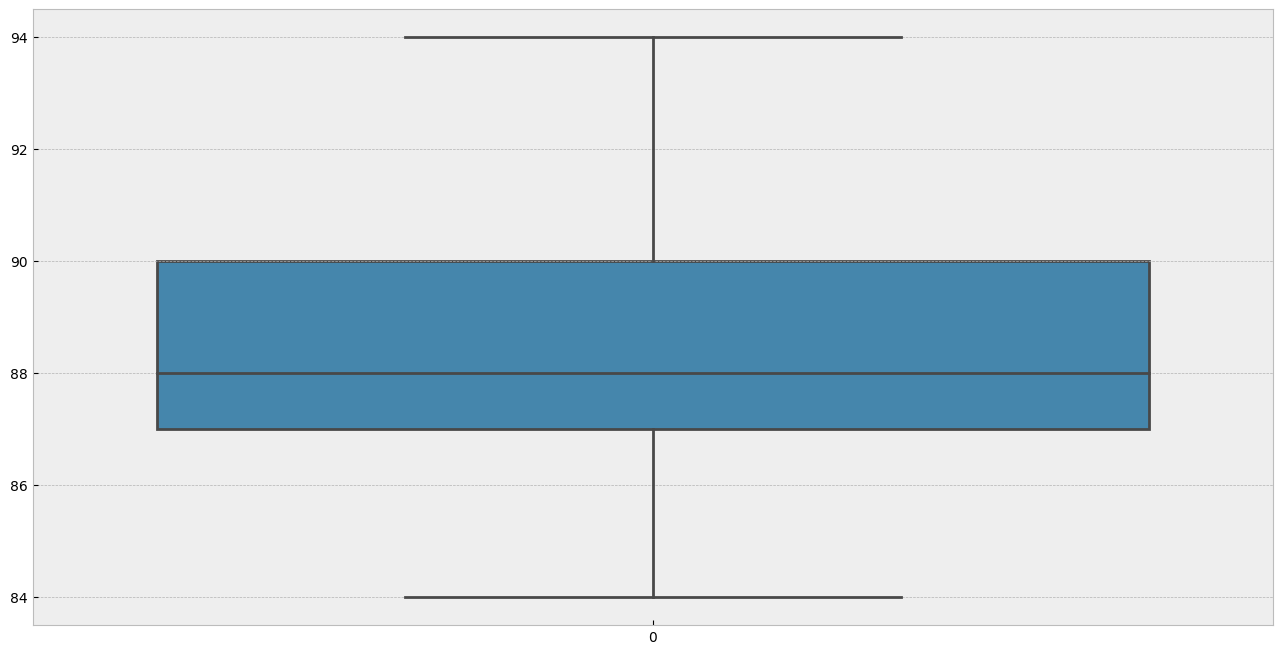

In [247]:
sns.boxplot(terminal_usage)
plt.show()

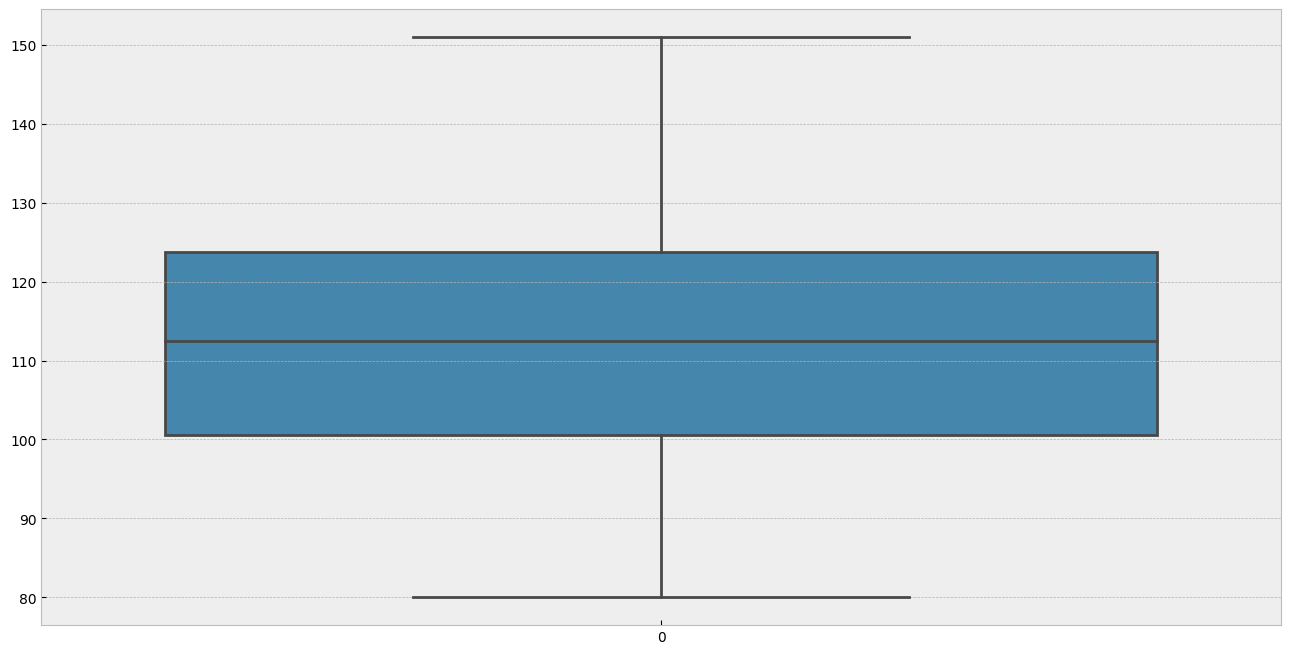

In [248]:
sns.boxplot(storage_used)
plt.show()